In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(96,96))

Found 101965 images belonging to 2 classes.


In [4]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(96,96))

Found 20076 images belonging to 2 classes.


In [5]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (96,96))
        img = img / 255.0
        return img

In [6]:
model = Sequential()

pretrained_model= tf.keras.applications.DenseNet201(include_top=False,
                   input_shape= (96,96,3),
                   pooling='max',classes=2,
                   weights='imagenet')

model.add(pretrained_model)

In [21]:

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='selu'))

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
 dense_5 (Dense)             (None, 256)               7

In [ ]:

model.compile(optimizer=Adam(lr=3e-4),loss='hinge',metrics=['acc'])
history = model.fit(trainingdt,validation_data= testingdt,epochs=10,steps_per_epoch=100) 

Epoch 1/10
100/100 [==============================] - 2365s 22s/step - loss: 1.0331 - acc: 0.4969 - val_loss: 1.0277 - val_acc: 0.5004
Epoch 2/10
100/100 [==============================] - 2308s 23s/step - loss: 1.0237 - acc: 0.5147 - val_loss: 1.0210 - val_acc: 0.5004
Epoch 3/10
100/100 [==============================] - 2275s 23s/step - loss: 1.0193 - acc: 0.4953 - val_loss: 1.0159 - val_acc: 0.5004
Epoch 4/10
100/100 [==============================] - 2341s 24s/step - loss: 1.0141 - acc: 0.5009 - val_loss: 1.0121 - val_acc: 0.5004
Epoch 5/10
100/100 [==============================] - 2408s 24s/step - loss: 1.0114 - acc: 0.4981 - val_loss: 1.0092 - val_acc: 0.5004
Epoch 6/10
100/100 [==============================] - 10493s 106s/step - loss: 1.0087 - acc: 0.4900 - val_loss: 1.0070 - val_acc: 0.5004
Epoch 7/10
 87/100 [=========================>....] - ETA: 2:31 - loss: 1.0063 - acc: 0.5072

In [12]:
model.save('densenet201selu.h5')

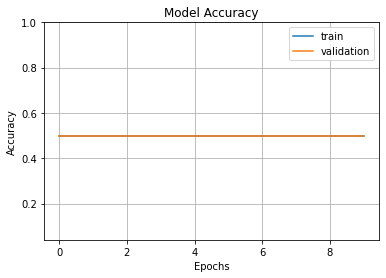

In [15]:
fig1 = plt.gcf()
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

plt.axis(ymin=0.04,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

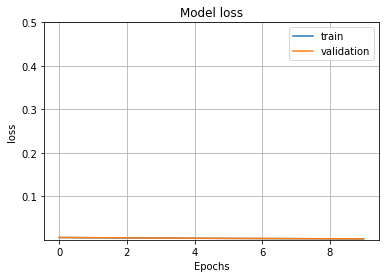

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.axis(ymin=0.0001,ymax=0.5)
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()